## Observations and Insights
One observation that can be made from this data is that there is a strong, positive correlation between the average tumor volume and mouse weight. This shows that mice that are heavier can be expected to have higher tumor volume and may need more rigorous treatment regimens than mice that are lighter.

Another observation that can be made is the Infubinol drug regimen does contain an outlier when looking at the final tumor volume of the mice. This could potentially be skewing the data and is necessary to take into account when drawing any conclusions about this particular regimen. 

Finally, it can be observed that Capomulin and Ramicane have a higher amount of total measurements taken in comparison to the other drug regimens. This

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
unique_mice = len(merged_data["Mouse ID"].unique())
unique_mice

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])
merged_data.duplicated(subset=['Mouse ID', 'Timepoint']).sum()
merged_data.loc[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
dropped_data_df = merged_data.drop_duplicates(subset=['Mouse ID','Timepoint'], keep ='first')
dropped_data_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Checking the number of mice in the clean DataFrame.
len(dropped_data_df['Mouse ID'].unique())

249

## Summary Statistics

In [73]:
#create groupby
summary_data_df = dropped_data_df.groupby(['Drug Regimen'])
#calculate statistics
mean_data = summary_data_df['Tumor Volume (mm3)'].mean()
median_data = summary_data_df['Tumor Volume (mm3)'].median()
variance_data = summary_data_df['Tumor Volume (mm3)'].var()
standard_dev_data = summary_data_df['Tumor Volume (mm3)'].std()
standard_error_data = summary_data_df['Tumor Volume (mm3)'].sem()

In [56]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_table_df = pd.merge(mean_data, median_data, on="Drug Regimen", how="outer")
summary_table_df = summary_table_df.rename(columns={"Tumor Volume (mm3)_x":"Average Tumor Volume (mm3)",
                                                    "Tumor Volume (mm3)_y":"Median Tumor Volume (mm3)"})

summary_table_df = pd.merge(summary_table_df, variance_data, on="Drug Regimen", how="outer")
summary_table_df = summary_table_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume Variance'})

summary_table_df = pd.merge(summary_table_df, standard_dev_data, on="Drug Regimen", how="outer")
summary_table_df = summary_table_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume St. Deviation'})

summary_table_df = pd.merge(summary_table_df, standard_error_data, on="Drug Regimen", how="outer")
summary_table_df = summary_table_df.rename(columns={'Tumor Volume (mm3)':'Tumor Volume SEM'})

summary_table_df

,Average Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance,Tumor Volume St. Deviation,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [15]:
# Using the aggregation method, produce the same summary statistics in a single line
aggregate_summary = dropped_data_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean','median','var','std','sem']})
aggregate_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements for Each Drug Regimen')

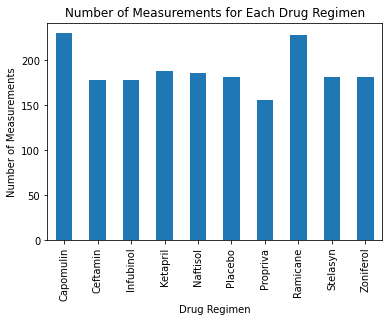

In [6]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
panda_bar = dropped_data_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
bar_plot = panda_bar.plot(kind="bar")

#Create plot labels
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Measurements")
bar_plot.set_title("Number of Measurements for Each Drug Regimen")

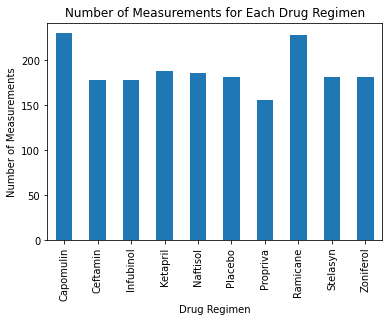

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
pyplot_bar = dropped_data_df.groupby('Drug Regimen').count()['Tumor Volume (mm3)']
#create plot
x_axis = np.arange(len(pyplot_bar))
tick_locations = [value for value in x_axis]
pyplot_bar_plot = pyplot_bar.plot.bar(legend=False)
plt.xticks(tick_locations, pyplot_bar.index.values, rotation="vertical")

#create labels for plot
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Measurements")
plt.title('Number of Measurements for Each Drug Regimen')

plt.show()

Text(0, 0.5, '')

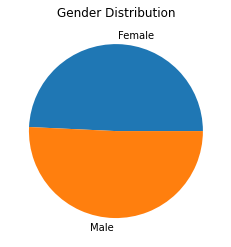

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_panda = dropped_data_df.groupby('Sex').count()['Mouse ID']
gender_plot = gender_panda.plot(kind='pie', title="Gender Distribution")

#hide y label
gender_plot.set_ylabel('')

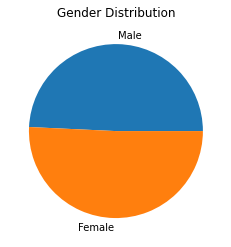

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pyplot = dropped_data_df.groupby('Sex').count()['Mouse ID']

#create labels
labels = 'Male','Female'

#create plot
plt.pie(gender_pyplot,labels=labels)
plt.title('Gender Distribution')

plt.show()

## Quartiles, Outliers and Boxplots

In [85]:
# Get last (greatest) timepoint for each mouse
mouse_final_timepoint = pd.DataFrame(dropped_data_df.groupby('Mouse ID')['Timepoint'].max().sort_values(ascending=False)).reset_index().rename(columns={'Timepoint': 'Last Timepoint'})
mouse_final_timepoint
# Merge group df with the original dataframe to get the tumor volume at the last timepoint
merged_df = pd.merge(dropped_data_df, mouse_final_timepoint, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Last Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [110]:
# Put treatments into a list
treatments = ['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor volume data
new_tumor_data = []

# Calculate the IQR and determine if there are outliers 
for treatment in treatments:
    drug_df = merged_df.loc[merged_df['Drug Regimen'] == treatment]
    
    final_volume_df = drug_df.loc[drug_df['Timepoint'] == drug_df['Last Timepoint']]
    
    tumor_values = final_volume_df['Tumor Volume (mm3)']
    new_tumor_data.append(tumor_values)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {treatment}: iqr')
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    print(f'Lower Bound for {treatment}: = {lower_bound}')
    print(f'Upper Bound for {treatment}: = {upper_bound}')
    
    outliers = (tumor_values.loc[(final_volume_df['Tumor Volume (mm3)']>=upper_bound) | 
                                 (final_volume_df['Tumor Volume (mm3)']<=lower_bound)]).count()
    print(f'{treatment} {outliers}')

IQR for Capomulin: iqr
Lower Bound for Capomulin: = 20.70456164999999
Upper Bound for Capomulin: = 51.83201549
Capomulin 0
IQR for Ramicane: iqr
Lower Bound for Ramicane: = 17.912664470000003
Upper Bound for Ramicane: = 54.30681135
Ramicane 0
IQR for Infubinol: iqr
Lower Bound for Infubinol: = 36.83290494999999
Upper Bound for Infubinol: = 82.74144559000001
Infubinol 1
IQR for Ceftamin: iqr
Lower Bound for Ceftamin: = 25.355449580000002
Upper Bound for Ceftamin: = 87.66645829999999
Ceftamin 0


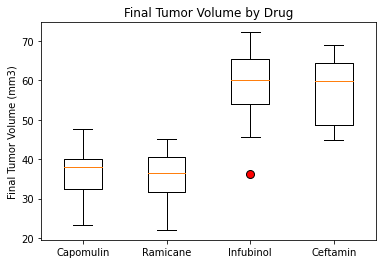

In [112]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
box_plot = dict(marker='o', markerfacecolor='r', markersize=8, markeredgecolor='black')
plt.boxplot(new_tumor_data, flierprops=box_plot)

#create labels
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

## Line and Scatter Plots

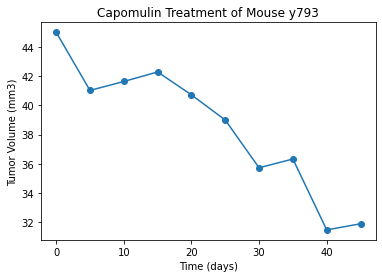

In [116]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse = dropped_data_df.loc[dropped_data_df['Mouse ID'] == 'y793']

#create plot
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o')

#create labels
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse y793")

plt.show()

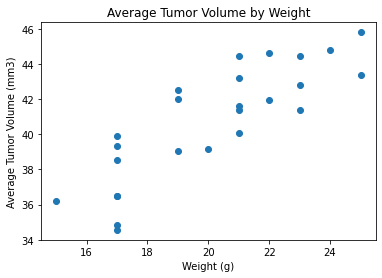

In [118]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = dropped_data_df.loc[dropped_data_df['Drug Regimen'] == 'Capomulin']

average_tumor_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'Average Tumor Volume'})

average_tumor_vol_df = pd.merge(capomulin_df, average_tumor_vol_df, on='Mouse ID')
average_tumor_vol_df = average_tumor_vol_df[['Weight (g)', 'Average Tumor Volume']].drop_duplicates()

x = average_tumor_vol_df['Weight (g)']
y = average_tumor_vol_df['Average Tumor Volume']

plt.scatter(x, y)

#create labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')

plt.show()

## Correlation and Regression

The correlation coefficient is 0.84.


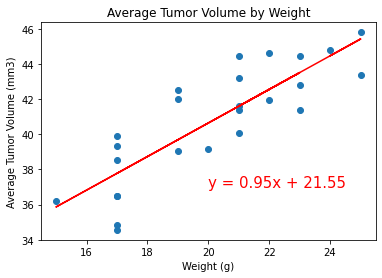

In [121]:
# Calculate the correlation coefficient
correlation = st.pearsonr(x,y)
print(f"The correlation coefficient is {round(correlation[0],2)}.")

#calculate linear regression equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_values = x * slope + intercept
line_equation = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#create plot
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")

plt.annotate(line_equation,(20,37),fontsize=15,color="red")

#create labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()